In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('emails.csv')
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [5]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

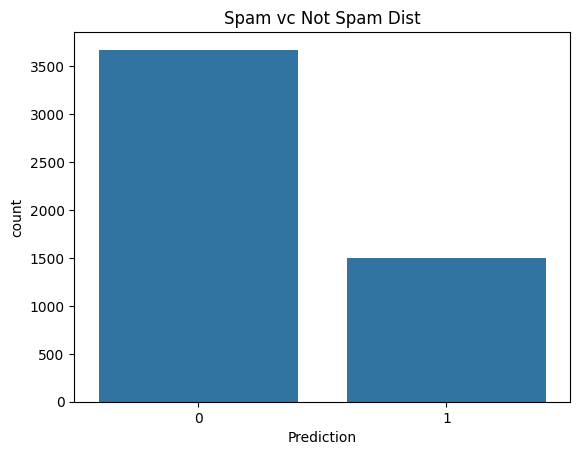

Prediction
0    3672
1    1500
Name: count, dtype: int64

In [13]:
sns.countplot(x = 'Prediction', data = df)
plt.title('Spam vc Not Spam Dist')
plt.show()


df['Prediction'].value_counts()

In [12]:
X = df.drop(columns=['Email No.', 'Prediction'])
y = df['Prediction']

X.shape, y.shape

((5172, 3000), (5172,))

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [23]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#mean=0,standard deviation=1

In [29]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_scaled, y_train)
y_knn_pred = knn.predict(X_test_scaled)


In [31]:
svm = SVC(kernel = 'rbf', random_state = 42)
svm.fit(X_train_scaled, y_train)
y_svm_pred = svm.predict(X_test_scaled)

In [32]:
print("\nKNN Accuracy:", accuracy_score(y_test, y_knn_pred))
print("Confusion Matrix (KNN):\n", confusion_matrix(y_test, y_knn_pred))
print(classification_report(y_test, y_knn_pred))

print("\nSVM Accuracy:", accuracy_score(y_test, y_svm_pred))
print("Confusion Matrix (SVM):\n", confusion_matrix(y_test, y_svm_pred))
print(classification_report(y_test, y_svm_pred))


KNN Accuracy: 0.8454106280193237
Confusion Matrix (KNN):
 [[593 146]
 [ 14 282]]
              precision    recall  f1-score   support

           0       0.98      0.80      0.88       739
           1       0.66      0.95      0.78       296

    accuracy                           0.85      1035
   macro avg       0.82      0.88      0.83      1035
weighted avg       0.89      0.85      0.85      1035


SVM Accuracy: 0.9468599033816425
Confusion Matrix (SVM):
 [[738   1]
 [ 54 242]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       739
           1       1.00      0.82      0.90       296

    accuracy                           0.95      1035
   macro avg       0.96      0.91      0.93      1035
weighted avg       0.95      0.95      0.95      1035

